<a href="https://colab.research.google.com/github/mansibhakare11/DL_ASS/blob/main/DL_LAB_ASS_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab Lab Assignment -NLP

**Course Name:** Deep Learning

**Lab Title:** Time Series Forecasting using LSTM

**Student Name:** Bhakare Mansi

**Student ID:** 202302040005

**Date of Submission:** 25-4-25


# Experiment 5.1

1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense


2. Load the Dataset

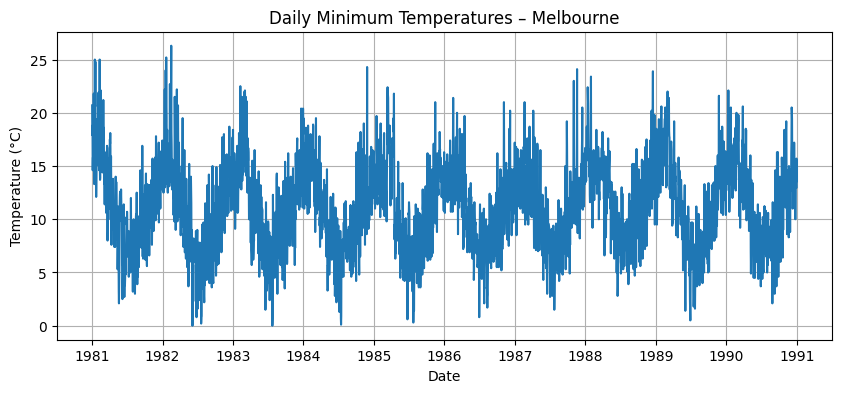

In [ ]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

plt.figure(figsize=(10,4))
plt.plot(df['Temp'])
plt.title("Daily Minimum Temperatures – Melbourne")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid()
plt.show()


3. Data Preprocessing

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Temp']])

def create_dataset(data, time_step=30):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 30
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)


4. Train-Test Split

In [ ]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


5. LSTM Model

In [ ]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.build(input_shape=(None, time_step, 1))
model.summary()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 30, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0473 - val_loss: 0.0103
Epoch 2/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0119 - val_loss: 0.0098
Epoch 3/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0117 - val_loss: 0.0100
Epoch 4/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0116 - val_loss: 0.0104
Epoch 5/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0115 - val_loss: 0.0093
Epoch 6/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0108 - val_loss: 0.0092
Epoch 7/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0111 - val_loss: 0.0092
Epoch 8/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0107 - val_loss: 0.0086
Epoch 9/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0100 - val_loss: 0.0079
Epoch 10/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0094 - val_loss: 0.0080
Epoch 11/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0094 - val_loss: 0.0072
Epoch 12/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0

6. Model Evaluation

In [ ]:
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1,1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))

rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
RMSE: 2.34
MAE: 1.85


7. Prediction vs Actual Plot

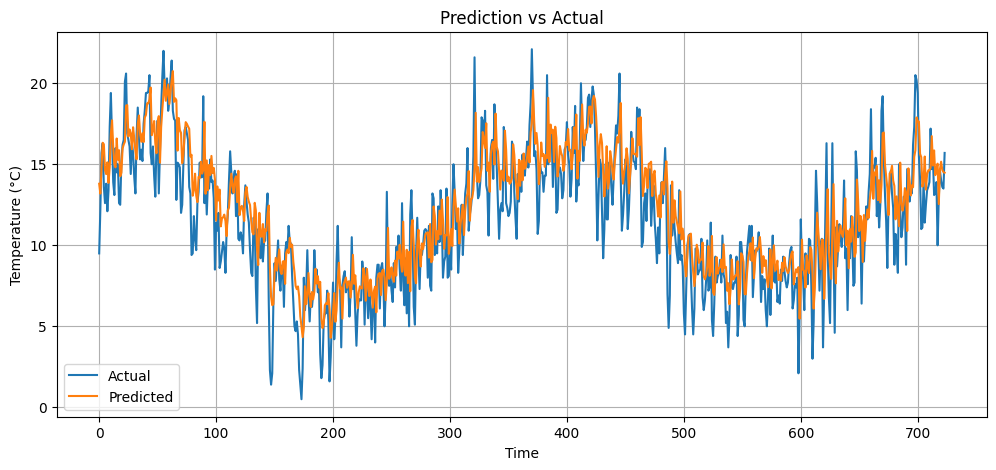

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title("Prediction vs Actual")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid()
plt.show()


# Experiment 5.2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import plot_model
import tensorflow as tf
import re

In [ ]:
url = 'https://raw.githubusercontent.com/amoudgl/short-jokes-dataset/master/data/reddit-cleanjokes.csv'
df = pd.read_csv(url)
df.dropna(inplace=True)

# Preview
print(df.head())


   ID                                               Joke
0   1  What did the bartender say to the jumper cable...
1   2  Don't you hate jokes about German sausage? The...
2   3  Two artists had an art contest... It ended in ...
3   4  Why did the chicken cross the playground? To g...
4   5   What gun do you use to hunt a moose? A moosecut!


In [ ]:

# Use a small subset to avoid memory crash
jokes = df['Joke'].tolist()[:5000]

# Optional cleaning + lowercase
cleaned_jokes = [re.sub(r'[^a-z\s]', '', joke.lower()) for joke in jokes]

# Tokenizer on the full joke set
tokenizer = Tokenizer()
tokenizer.fit_on_texts(cleaned_jokes)
total_words = len(tokenizer.word_index) + 1

# Generate n-gram sequences joke by joke
input_sequences = []
for joke in cleaned_jokes:
    token_list = tokenizer.texts_to_sequences([joke])[0]
    for i in range(1, len(token_list)):
        n_gram_seq = token_list[:i+1]
        input_sequences.append(n_gram_seq)

# Optional: limit sequence count for Colab memory
input_sequences = input_sequences[:20000]

# Pad the sequences
max_seq_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')

# Prepare inputs and labels
X = input_sequences[:, :-1]
y = input_sequences[:, -1]

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 50, input_length=max_seq_len-1))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, max_seq_len-1))
model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 39, 50)         │       231,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 100)            │        60,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4622)           │       466,822 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 758,322 (2.89 MB)

 Trainable params: 758,322 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X, y, epochs=50, verbose=1)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 48ms/step - accuracy: 0.0487 - loss: 7.1620
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.0691 - loss: 6.3584
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.1078 - loss: 5.9656
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.1269 - loss: 5.6431
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.1618 - loss: 5.2952
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.1772 - loss: 5.0337
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.2007 - loss: 4.7249
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.2133 - loss: 4.4911
Epoch 9/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.2296 - loss: 4.2655
Epoch 10/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.2572 - loss: 4.0099
Epoch 11/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.2705 - loss: 3.8046
Epoch 12/50
625/625 ━━━━━━━━━━

In [ ]:
def generate_text(seed_text, next_words=20):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
        predicted = model.predict(token_list, verbose=0).argmax()

        for word, index in tokenizer.word_index.items():
            if index == predicted:
                seed_text += " " + word
                break
    return seed_text

print(generate_text("How are you"))


How are you buy joyful a washing machine credit are on really ear you hafta shake the l out of them more for


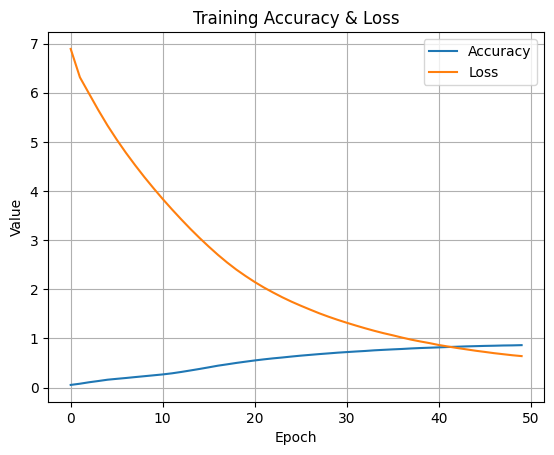

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.title('Training Accuracy & Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()


# Experiment 5.3

Import Necessary Libraries

In [ ]:
import json
import pandas as pd
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


Load the Dataset

In [ ]:
# Read the JSON file line by line (if it's a JSON file with multiple objects)
with open("/content/Sarcasm_Headlines_Dataset.json", "r") as file:
    data = [json.loads(line) for line in file]

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

# Check the first few rows to understand the structure
print(df.head())
print(df.columns)


                                        article_link  \
0  https://www.huffingtonpost.com/entry/versace-b...   
1  https://www.huffingtonpost.com/entry/roseanne-...   
2  https://local.theonion.com/mom-starting-to-fea...   
3  https://politics.theonion.com/boehner-just-wan...   
4  https://www.huffingtonpost.com/entry/jk-rowlin...   

                                            headline  is_sarcastic  
0  former versace store clerk sues over secret 'b...             0  
1  the 'roseanne' revival catches up to our thorn...             0  
2  mom starting to fear son's web series closest ...             1  
3  boehner just wants wife to listen, not come up...             1  
4  j.k. rowling wishes snape happy birthday in th...             0  
Index(['article_link', 'headline', 'is_sarcastic'], dtype='object')


Clean the Text Data

In [ ]:
# Function to clean text (convert to lowercase, remove URLs, and non-alphabetic characters)
def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-z\s]", "", text)  # Remove non-alphabetic characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply the cleaning function to the text column
df['headline'] = df['headline'].apply(clean_text)

# Check cleaned text
df['headline'].head()


,headline
0,former versace store clerk sues over secret bl...
1,the roseanne revival catches up to our thorny ...
2,mom starting to fear sons web series closest t...
3,boehner just wants wife to listen not come up ...
4,jk rowling wishes snape happy birthday in the ...


Tokenize the Text

In [ ]:
# Tokenize the text using Keras Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['headline'])  # Fit tokenizer on the text data

# Convert text to sequences of integers
sequences = tokenizer.texts_to_sequences(df['headline'])

# Check the sequences for the first few rows
print(sequences[:5])


[[287, 14403, 781, 3503, 2212, 47, 353, 92, 2110, 5, 2476, 8141], [3, 8142, 3240, 2646, 27, 1, 153, 8143, 385, 2835, 5, 238, 8, 934], [139, 801, 1, 782, 1076, 2017, 562, 4566, 195, 138, 38, 45, 1, 10345], [1439, 34, 205, 415, 1, 1624, 28, 299, 27, 9, 3241, 14404, 845], [4567, 4568, 872, 10346, 563, 543, 4, 3, 90, 1223, 91]]


Pad Sequences

In [ ]:
# Pad sequences so they all have the same length
max_len = max(len(seq) for seq in sequences)  # Find the maximum sequence length
X = pad_sequences(sequences, maxlen=max_len, padding='post')  # Pad sequences

# Check the padded sequences
print(X[:5])


[[  287 14403   781  3503  2212    47   353    92  2110     5  2476  8141
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [    3  8142  3240  2646    27     1   153  8143   385  2835     5   238
      8   934     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [  139   801     1   782  1076  2017   562  4566   195   138    38    45
      1 10345     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [ 1439    34   205   415     1  1624    28   299    27     9  3241 14404
    845     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [ 4567  4568   872 10346   563   543     4     3   

Prepare Labels (Sarcasm vs. Non-Sarcasm)

In [ ]:
# Extract the labels (sarcasm = 1, not sarcastic = 0)
y = df['is_sarcastic'].values

# Check the labels
print(y[:5])


[0 0 1 1 0]


Split the Data into Training and Testing Sets

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (21367, 38)
Test data shape: (5342, 38)


Build the LSTM Model

In [ ]:
# Build the LSTM model
vocab_size = len(tokenizer.word_index) + 1  # Size of the vocabulary (including padding token)

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))  # Embedding layer
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))  # LSTM layer
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.build(input_shape=(None, max_len))  # Batch size is None (can be any), input is padded to max_len
# Display the model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 38, 128)        │     3,535,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,666,945 (13.99 MB)

 Trainable params: 3,666,945 (13.99 MB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Check training history
history.history.keys()


Epoch 1/5
535/535 ━━━━━━━━━━━━━━━━━━━━ 94s 140ms/step - accuracy: 0.5697 - loss: 0.6785 - val_accuracy: 0.5538 - val_loss: 0.6948
Epoch 2/5
535/535 ━━━━━━━━━━━━━━━━━━━━ 81s 138ms/step - accuracy: 0.5609 - loss: 0.6873 - val_accuracy: 0.5538 - val_loss: 0.6874
Epoch 3/5
535/535 ━━━━━━━━━━━━━━━━━━━━ 88s 150ms/step - accuracy: 0.6129 - loss: 0.6505 - val_accuracy: 0.7569 - val_loss: 0.5567
Epoch 4/5
535/535 ━━━━━━━━━━━━━━━━━━━━ 75s 140ms/step - accuracy: 0.8179 - loss: 0.4753 - val_accuracy: 0.7656 - val_loss: 0.5113
Epoch 5/5
535/535 ━━━━━━━━━━━━━━━━━━━━ 80s 137ms/step - accuracy: 0.8591 - loss: 0.3655 - val_accuracy: 0.8285 - val_loss: 0.4146


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Evaluate the Model

167/167 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step
               precision    recall  f1-score   support

Not Sarcastic       0.82      0.91      0.86      2996
    Sarcastic       0.86      0.74      0.80      2346

     accuracy                           0.83      5342
    macro avg       0.84      0.82      0.83      5342
 weighted avg       0.84      0.83      0.83      5342



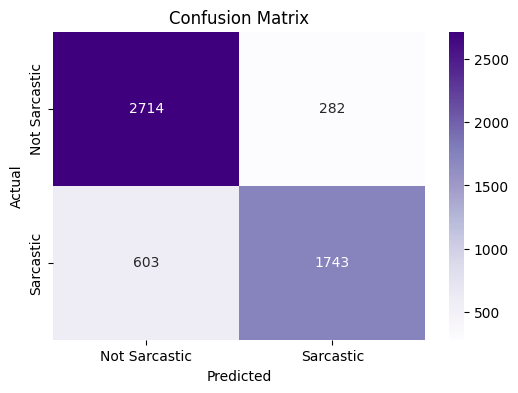

In [ ]:
# Predict on the test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print(classification_report(y_test, y_pred, target_names=['Not Sarcastic', 'Sarcastic']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Not Sarcastic', 'Sarcastic'], yticklabels=['Not Sarcastic', 'Sarcastic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Visualize Training Performance

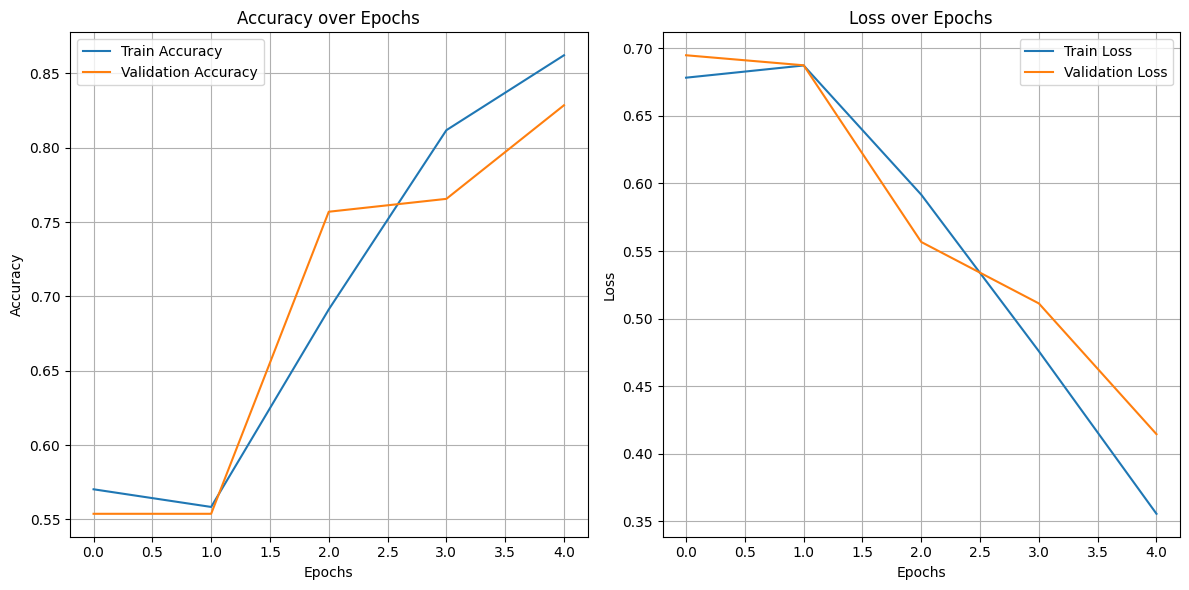

In [ ]:
# Plot Accuracy and Loss over Epochs
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Prediction on Real Time data


In [ ]:
def preprocess_text(text, tokenizer, max_len):
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=max_len, padding='post', truncating='post')
    return padded


In [ ]:
def predict_sarcasm(text):
    processed = preprocess_text(text, tokenizer, max_len)
    prediction = model.predict(processed)[0][0]  # Get scalar output from batch
    label = "Sarcastic 🤨" if prediction >= 0.5 else "Not Sarcastic 🙂"
    print(f"Input: {text}")
    print(f"Prediction Score: {prediction:.4f}")
    print(f"Label: {label}")


In [ ]:
predict_sarcasm("Wow, I'm so glad I stayed up all night just to miss the deadline by one minute.")

predict_sarcasm("Nothing makes me happier than my laptop crashing right before I save my work.")

predict_sarcasm("Oh perfect, it’s raining again and I forgot my umbrella. Best day ever.")

predict_sarcasm("Sure, because adding more meetings to my calendar is exactly what I needed.")

predict_sarcasm("I just *love* it when the internet cuts out during an important Zoom call.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Input: Wow, I'm so glad I stayed up all night just to miss the deadline by one minute.
Prediction Score: 0.8874
Label: Sarcastic 🤨
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
Input: Nothing makes me happier than my laptop crashing right before I save my work.
Prediction Score: 0.2851
Label: Not Sarcastic 🙂
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Input: Oh perfect, it’s raining again and I forgot my umbrella. Best day ever.
Prediction Score: 0.0982
Label: Not Sarcastic 🙂
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Input: Sure, because adding more meetings to my calendar is exactly what I needed.
Prediction Score: 0.1029
Label: Not Sarcastic 🙂
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Input: I just *love* it when the internet cuts out during an important Zoom call.
Prediction Score: 0.0608
Label: Not Sarcastic 🙂
